In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv('https://raw.githubusercontent.com/nickkatsy/python_ml_ect_/master/PRODUCT_SALES.csv')

df.info()
df.isna().sum()
df.nunique()
df['Customer_Gender'] = df['Customer_Gender'].map({"M":0,"F":1})

df['Age_Group'].value_counts()


age_groups = ['Adults (35-64)','Young Adults (25-34)','Youth (<25)',"Seniors (64+)"]

df['Age_Group'] = pd.Categorical(df.Age_Group,categories=age_groups,ordered=True)
df['Adults'] = pd.get_dummies(df['Age_Group'],prefix='Age_Group').iloc[:,0:1]
df['Young_Adults'] = pd.get_dummies(df.Age_Group,prefix='Age_Group').iloc[:,1:2]
df['Youth'] = pd.get_dummies(df.Age_Group,prefix='Age_Group').iloc[:,2:3]



df.drop_duplicates(inplace=True)

df.isna().sum()

df['Product_Category'].value_counts()



df['Country'].value_counts()

df['Month'].nunique()

df.isna().sum()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


df1 = df.copy()


for i in df1:
    df1[i] = le.fit_transform(df1[i])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  int64  
 5   Age_Group         113036 non-null  object 
 6   Age_Group_NUMBER  113036 non-null  int64  
 7   Customer_Gender   113036 non-null  object 
 8   Country           113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Order_Quantity    113036 non-null  int64  
 11  Unit_Cost         113036 non-null  float64
 12  Unit_Price        113036 non-null  float64
 13  Profit            113036 non-null  float64
 14  Cost              113036 non-null  float64
 15  Revenue           113036 non-null  float64
dtypes: float64(5), int64

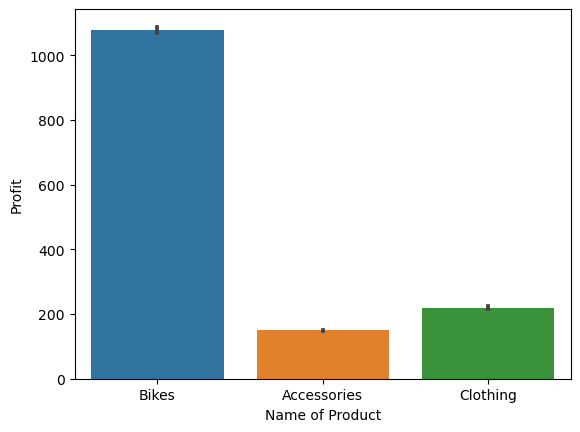

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#profit based on product

def product_profit(df):
    sns.barplot(x=df['Product_Category'],y=df['Profit'])
    plt.xlabel('Name of Product')
    plt.ylabel('Profit')
    plt.show()



product_profit(df)


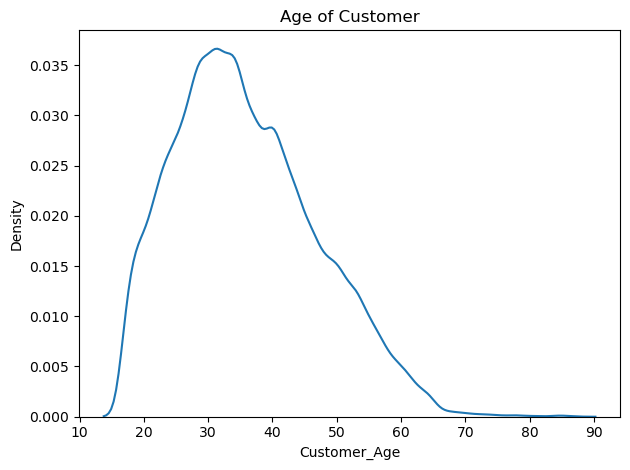

In [3]:
#peak customer age 
def customer_age(df):
    sns.kdeplot(x='Customer_Age',data=df)
    plt.title('Age of Customer')
    plt.tight_layout()
    plt.show()
    
customer_age(df)

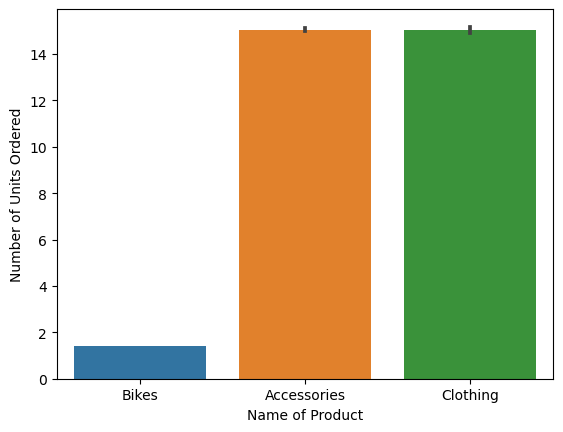

In [4]:
#Most frequent orders based on product
def order_quant_type(df):
    sns.barplot(x='Product_Category',y='Order_Quantity',data=df)
    plt.xlabel('Name of Product')
    plt.ylabel('Number of Units Ordered')
    plt.show()


order_quant_type(df)


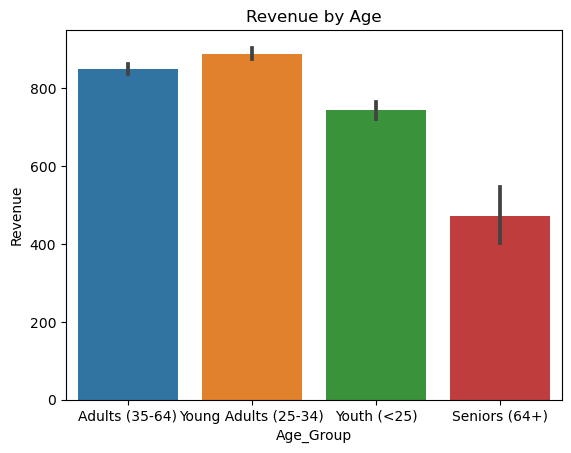

In [5]:
def bar_age(df):
    sns.barplot(x=df['Age_Group'],y=df['Revenue'])
    plt.ylabel('Revenue')
    plt.title('Revenue by Age')
    plt.show()


bar_age(df)

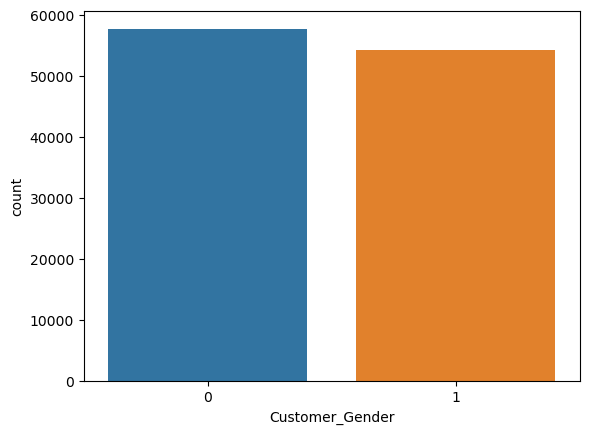

In [6]:
def countplot_customer_gender(dataframe):
    sns.countplot(x='Customer_Gender',data=df)
    plt.show()


countplot_customer_gender(df)

In [7]:
#profit maximization
df['profit'] = df['Revenue'] - df['Cost']

from scipy.optimize import minimize
import sympy as sym
import numpy as np

df['MR'] = sym.diff(df['Revenue'])
df['MC'] = sym.diff(df['Cost'])

df['pi'] = df['MR'] - df['MC']

df['max_profit'] = np.max(np.where(df['MR'] == df['MC']))
print(df['max_profit'])

def objective(x):
    MR = x[0]
    MC = x[1]
    lambda x: MR == MC
    return (np.linalg.norm(x))

min_cost = np.min(df['Cost'])
max_cost = np.max(df['Cost'])
min_revenue= np.min(df['Revenue'])
max_revenue = np.max(df['Revenue'])

b1 = [min_revenue,max_revenue]
b2 = [min_cost,max_cost]
b = (b1,b2)
x0 = [0.001,10000]
result = minimize(objective, x0,bounds=b,method='SLSQP')
print(result)

0         111898
1         111898
2         111898
3         111898
4         111898
           ...  
113031    111898
113032    111898
113033    111898
113034    111898
113035    111898
Name: max_profit, Length: 111901, dtype: int64
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.23606797749979
       x: [ 2.000e+00  1.000e+00]
     nit: 8
     jac: [ 8.944e-01  4.472e-01]
    nfev: 24
    njev: 8


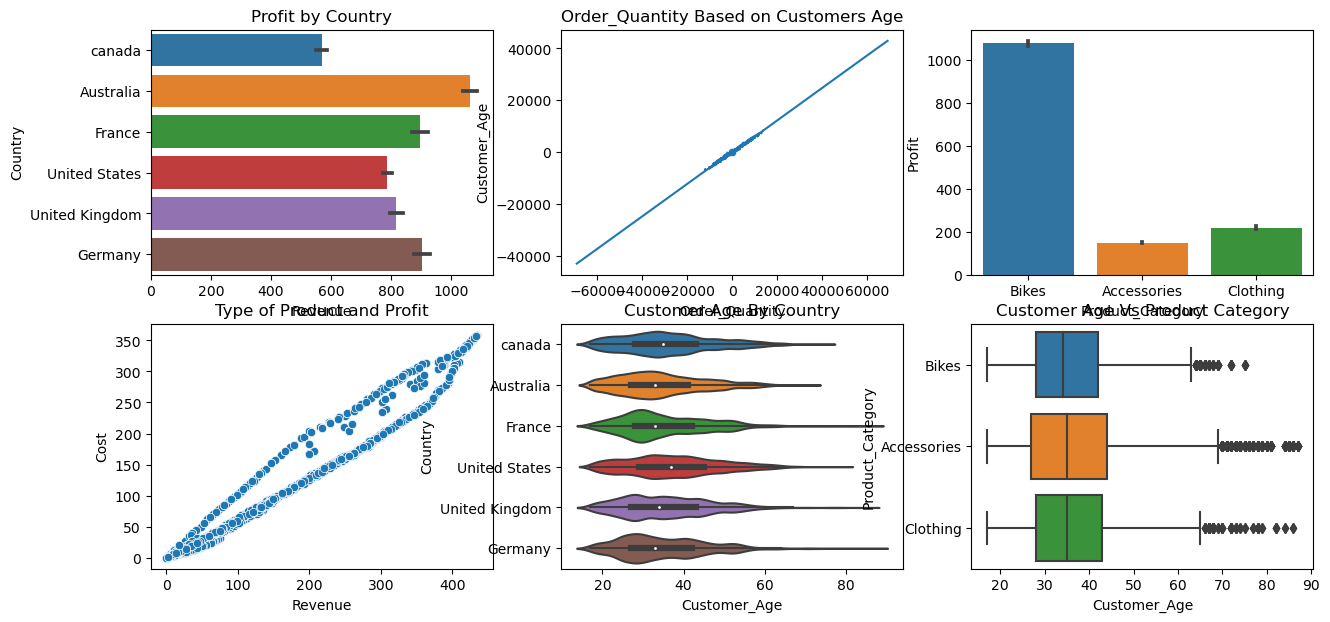

In [8]:

def subplots(df):
    _,axs = plt.subplots(2,3,figsize=(15,7))
    sns.barplot(x='Revenue',y='Country',ax=axs[0,0],data=df)
    axs[0,0].set_title('Profit by Country')
    
    sns.scatterplot(x='Order_Quantity',y='Customer_Age',ax=axs[0,1],data=df)
    axs[0,1].set_title('Order_Quantity Based on Customers Age')
    
    
    sns.barplot(x='Product_Category',y='Profit',ax=axs[0,2],data=df)
    axs[1,0].set_title('Type of Product and Profit')
    
    
    sns.scatterplot(x='Revenue',y='Cost',ax=axs[1,0],data=df1)
    sns.lineplot(x='MR',y='MC',ax=axs[0,1],data=df,palette='pastel')
    axs[1,1].set_title('Revenue Vs Cost')
    
    sns.violinplot(x='Customer_Age',y='Country',ax=axs[1,1],data=df)
    axs[1,1].set_title('Customer Age By Country')
    
    sns.boxplot(x='Customer_Age',y='Product_Category',ax=axs[1,2],data=df)
    axs[1,2].set_title('Customer Age Vs Product Category')


plt.show()



subplots(df)

In [9]:
#Data processing to find if the features effect revenue(they do just seeing if the cleaning went well)

df = df.drop(['Month','Day','Year','Date','Age_Group'],axis=1)

X = df.drop('Revenue',axis=1)
y = df['Revenue']


df.isna().sum()



from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='most_frequent')

from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (ohe,X.select_dtypes(include='object').columns),
    (si,X.select_dtypes(include=['int64','float64']).columns),remainder='passthrough')



ct.fit_transform(X)


from sklearn.pipeline import make_pipeline


from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
rfr = RandomForestRegressor()
BR = BaggingRegressor()





from sklearn.metrics import r2_score,mean_squared_error

def evaluate_model(X_train,X_test,y_train,y_test,model):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test,pred)
    print(f'{model.__class__.__name__}, --r2-- {r2*100:.2f}; --MSE-- {mse:.2f}')
    return pred


lr_pred = evaluate_model(X_train, X_test, y_train, y_test, lr)
rfr_pred = evaluate_model(X_train, X_test, y_train, y_test, rfr)
BR_pred = evaluate_model(X_train, X_test, y_train, y_test, BR)
ridge_pred = evaluate_model(X_train, X_test, y_train, y_test,ridge)
lasso_pred = evaluate_model(X_train, X_test, y_train, y_test, lasso)

LinearRegression, --r2-- 100.00; --MSE-- 0.00
RandomForestRegressor, --r2-- 98.95; --MSE-- 24718.21
BaggingRegressor, --r2-- 99.24; --MSE-- 17802.35
Ridge, --r2-- 100.00; --MSE-- 0.00
Lasso, --r2-- 100.00; --MSE-- 6.63


In [10]:
X_youth = df.drop('Youth',axis=1)
y_youth = df['Youth']

X_youth_train,X_youth_test,y_youth_train,y_youth_test = train_test_split(X_youth,y_youth,test_size=.20,random_state=42)



ct = make_column_transformer(
    (ohe,X_youth.select_dtypes(include='object').columns),
    (si,X_youth.select_dtypes(include=['float64','int64']).columns),remainder='passthrough')


ct.fit_transform(X_youth)


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
rfc = RandomForestClassifier()
BC = BaggingClassifier()

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()


from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

def evalL(X_youth_train,X_youth_test,y_youth_train,y_youth_test,model):
    pipe = make_pipeline(ct,model).fit(X_youth_train,y_youth_train)
    pred = pipe.predict(X_youth_test)
    pred_prob = pipe.predict_proba(X_youth_test)[:,1]
    acc = accuracy_score(y_youth_test,pred)
    con = confusion_matrix(y_youth_test, pred)
    roc = roc_auc_score(y_youth_test,pred_prob)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --ROC-- {roc*100:.2f}%')
    print('confusion matrix',con)
    return pred,pred_prob


clf_pred,clf_pred_prob = evalL(X_youth_train, X_youth_test, y_youth_train, y_youth_test,clf)
rfc_pred,rfc_pred_prob = evalL(X_youth_train, X_youth_test, y_youth_train, y_youth_test,rfc)
BC_pred,BC_pred_prob = evalL(X_youth_train, X_youth_test, y_youth_train, y_youth_test, BC)
nb_pred,nb_pred_prob = evalL(X_youth_train, X_youth_test, y_youth_train, y_youth_test, nb)

LogisticRegression, --ACC-- 96.95%; --ROC-- 99.50%
confusion matrix [[18674   213]
 [  470  3024]]
RandomForestClassifier, --ACC-- 100.00%; --ROC-- 100.00%
confusion matrix [[18887     0]
 [    0  3494]]
BaggingClassifier, --ACC-- 100.00%; --ROC-- 100.00%
confusion matrix [[18887     0]
 [    0  3494]]
GaussianNB, --ACC-- 99.97%; --ROC-- 99.99%
confusion matrix [[18885     2]
 [    5  3489]]
